In [1]:
from scipy.io import loadmat
# Load the MAT file
data_path = 'dataProScaled.mat'
data = loadmat(data_path)

# Explore the keys and structure of the loaded data
data_keys = list(data.keys())
data_structure = {key: type(data[key]) for key in data_keys}

# Provide the keys and their data types to understand the structure
data_keys, data_structure

(['__header__',
  '__version__',
  '__globals__',
  'dff_filtered',
  'green_idx',
  'positions',
  'red_idx'],
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'dff_filtered': numpy.ndarray,
  'green_idx': numpy.ndarray,
  'positions': numpy.ndarray,
  'red_idx': numpy.ndarray})

In [2]:
dff_filtered=data['dff_filtered']
print(dff_filtered.shape)

(5766, 6700)


In [3]:
dff_filtered_filters=data['dff_filtered']

## Filtering test

### Bandpass

In [4]:
import numpy as np
from scipy.signal import butter, filtfilt

def apply_butterworth_bandpass_filter(data, lowcut, highcut, fs, order=3):
   
    # Design the Butterworth bandpass filter
    nyq = 0.5 * fs  # Nyquist Frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')

    # Apply the filter to each row (time series) in the data array
    filtered_data = np.zeros_like(data)
    for i in range(data.shape[0]):
        filtered_data[i] = filtfilt(b, a, data[i])
    return filtered_data


In [21]:
dff_filtered_bandpass=apply_butterworth_bandpass_filter(dff_filtered_filters,1,10,160)

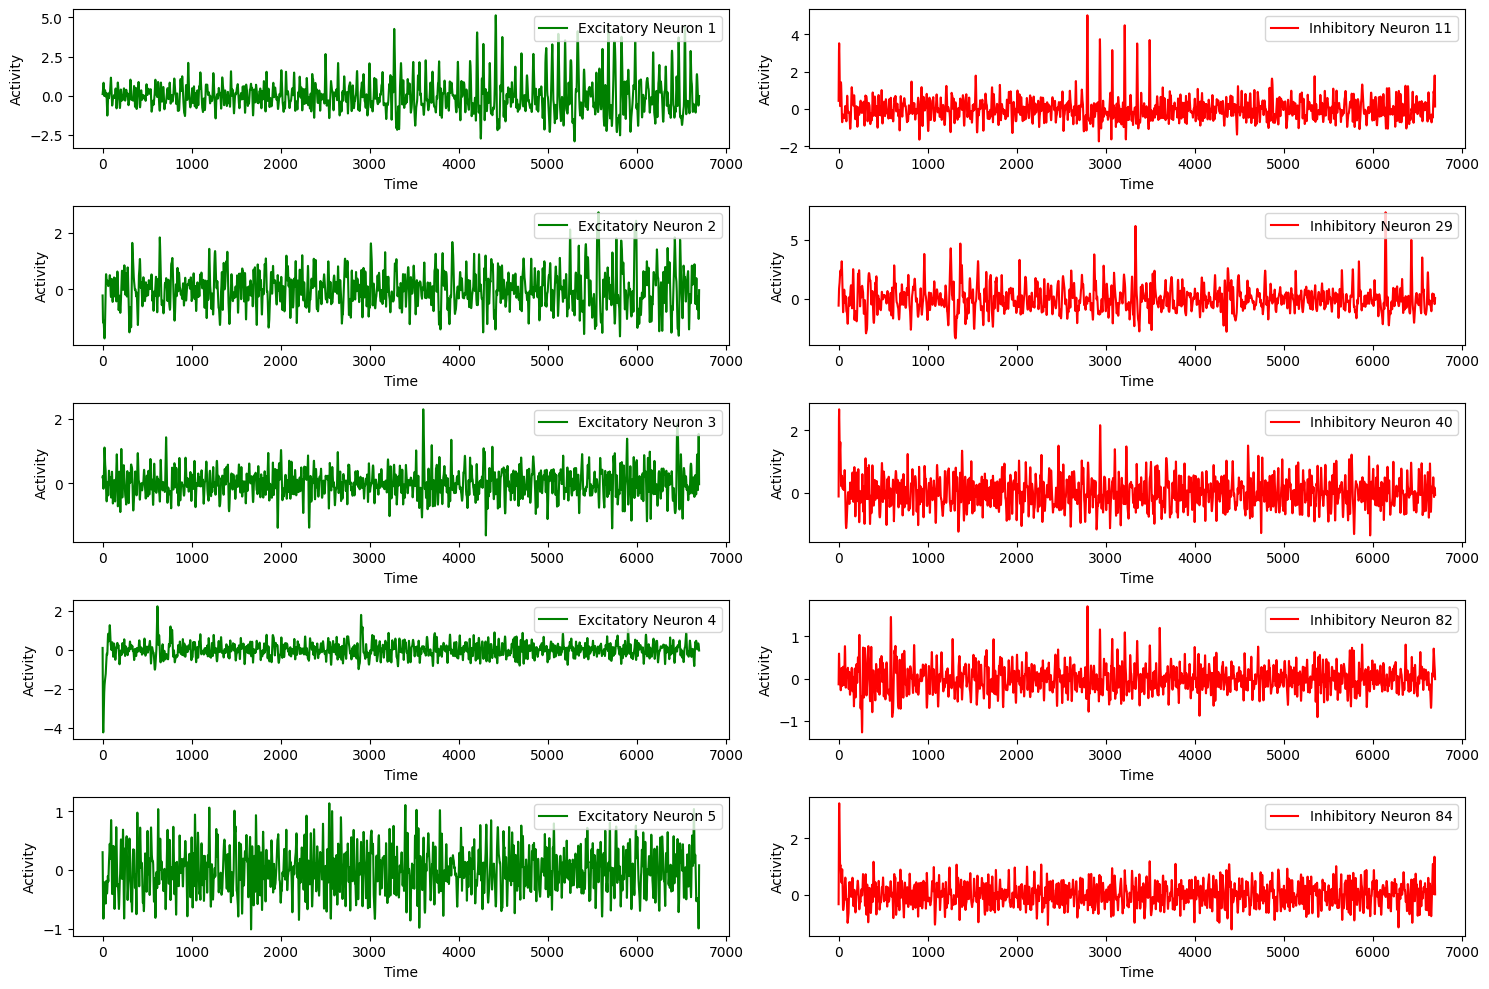

In [22]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtered_bandpass[selected_green_idx, :]
selected_red_data = dff_filtered_bandpass[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()


### Guassian

In [109]:
import numpy as np
from scipy.ndimage import gaussian_filter1d

def apply_gaussian_filter(data, sigma):
  
    filtered_data = np.zeros_like(data)
    for i in range(data.shape[0]):
        filtered_data[i] = gaussian_filter1d(data[i], sigma=sigma)
    return filtered_data


In [110]:
dff_filtered_guass=apply_gaussian_filter(dff_filtered_filters,4)

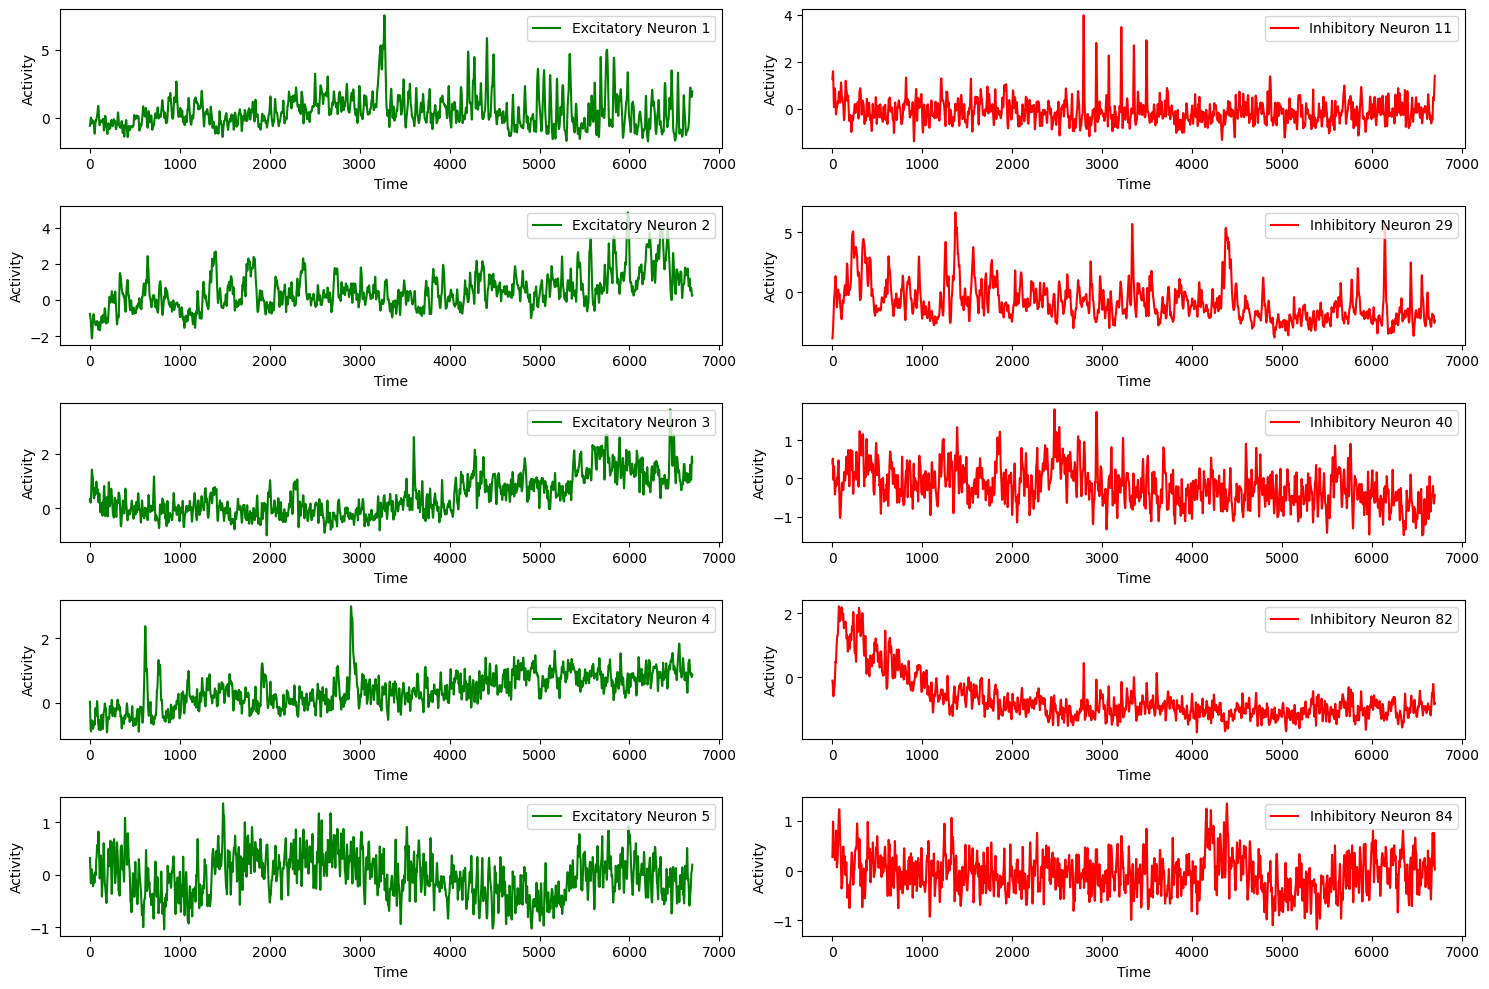

In [46]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtered_guass[selected_green_idx, :]
selected_red_data = dff_filtered_guass[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()




### TV

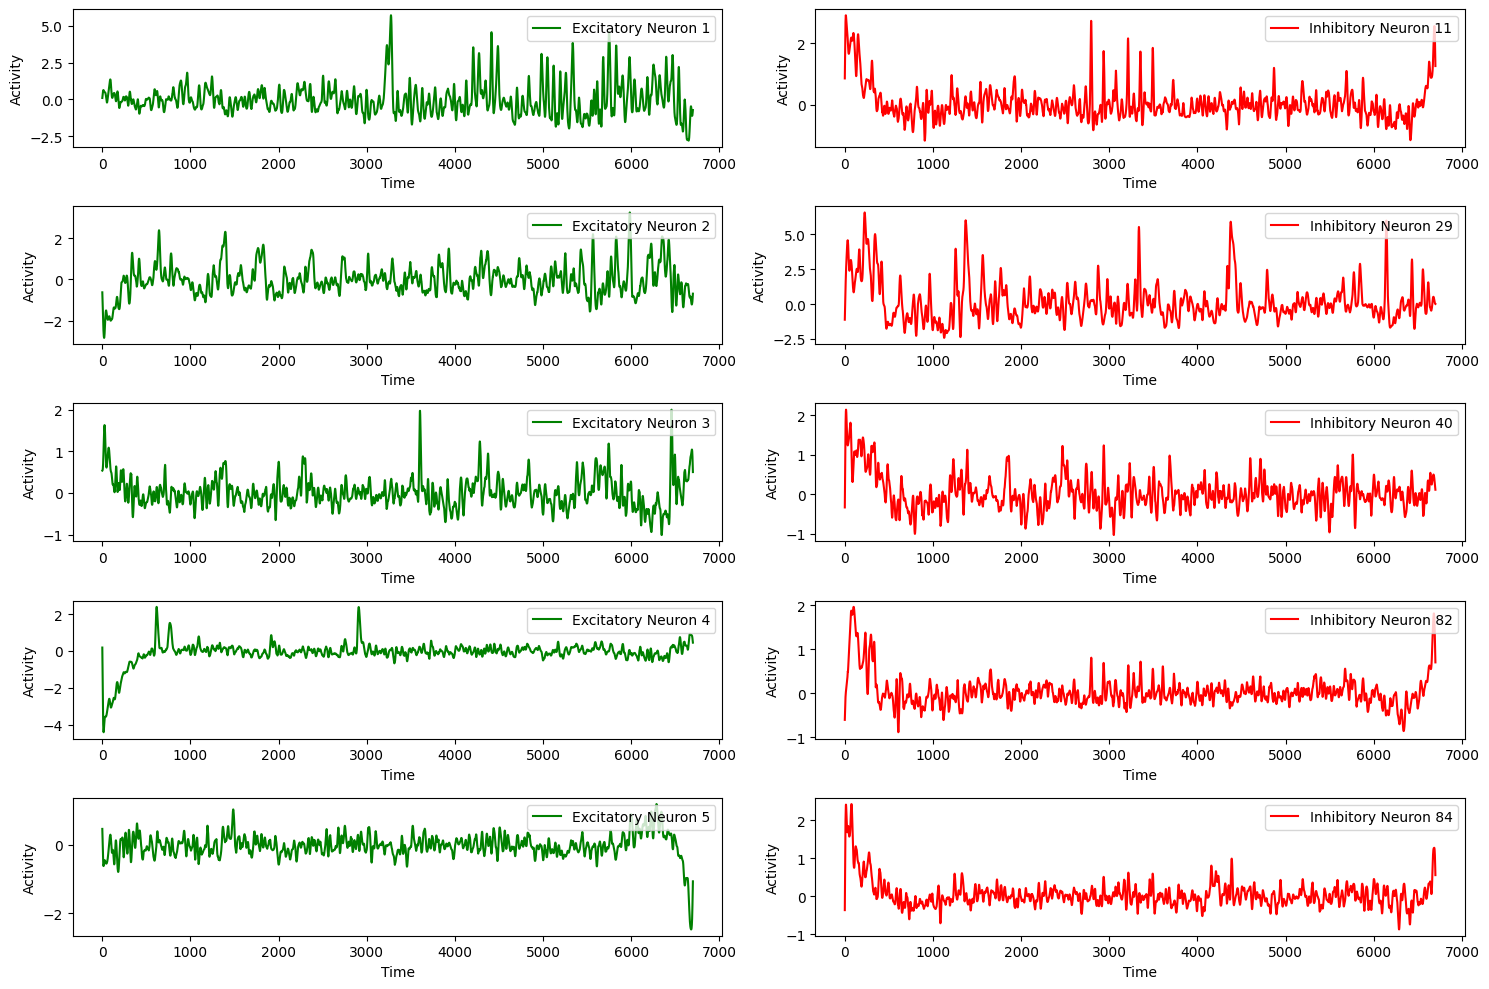

In [7]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = tv_denoised_data[selected_green_idx, :]
selected_red_data = tv_denoised_data[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()


### Wavelet 

In [7]:
import pywt
import numpy as np

def apply_wavelet_denoising(data, wavelet_name='db1', mode='soft', level=None):
   
    denoised_data = np.zeros_like(data)
    for i in range(data.shape[0]):
        # Compute the wavelet decomposition
        coeffs = pywt.wavedec(data[i], wavelet_name, level=level)
        
        # Threshold the wavelet coefficients
        coeffs_thresholded = [pywt.threshold(c, value=np.median(np.abs(c - np.median(c))) / 0.6745, mode=mode) if j != 0 else c for j, c in enumerate(coeffs)]
        
        # Reconstruct the signal using the thresholded coefficients
        denoised_data[i] = pywt.waverec(coeffs_thresholded, wavelet_name)
        
    return denoised_data


In [23]:
dff_filtered_wave=apply_wavelet_denoising(dff_filtered_bandpass)

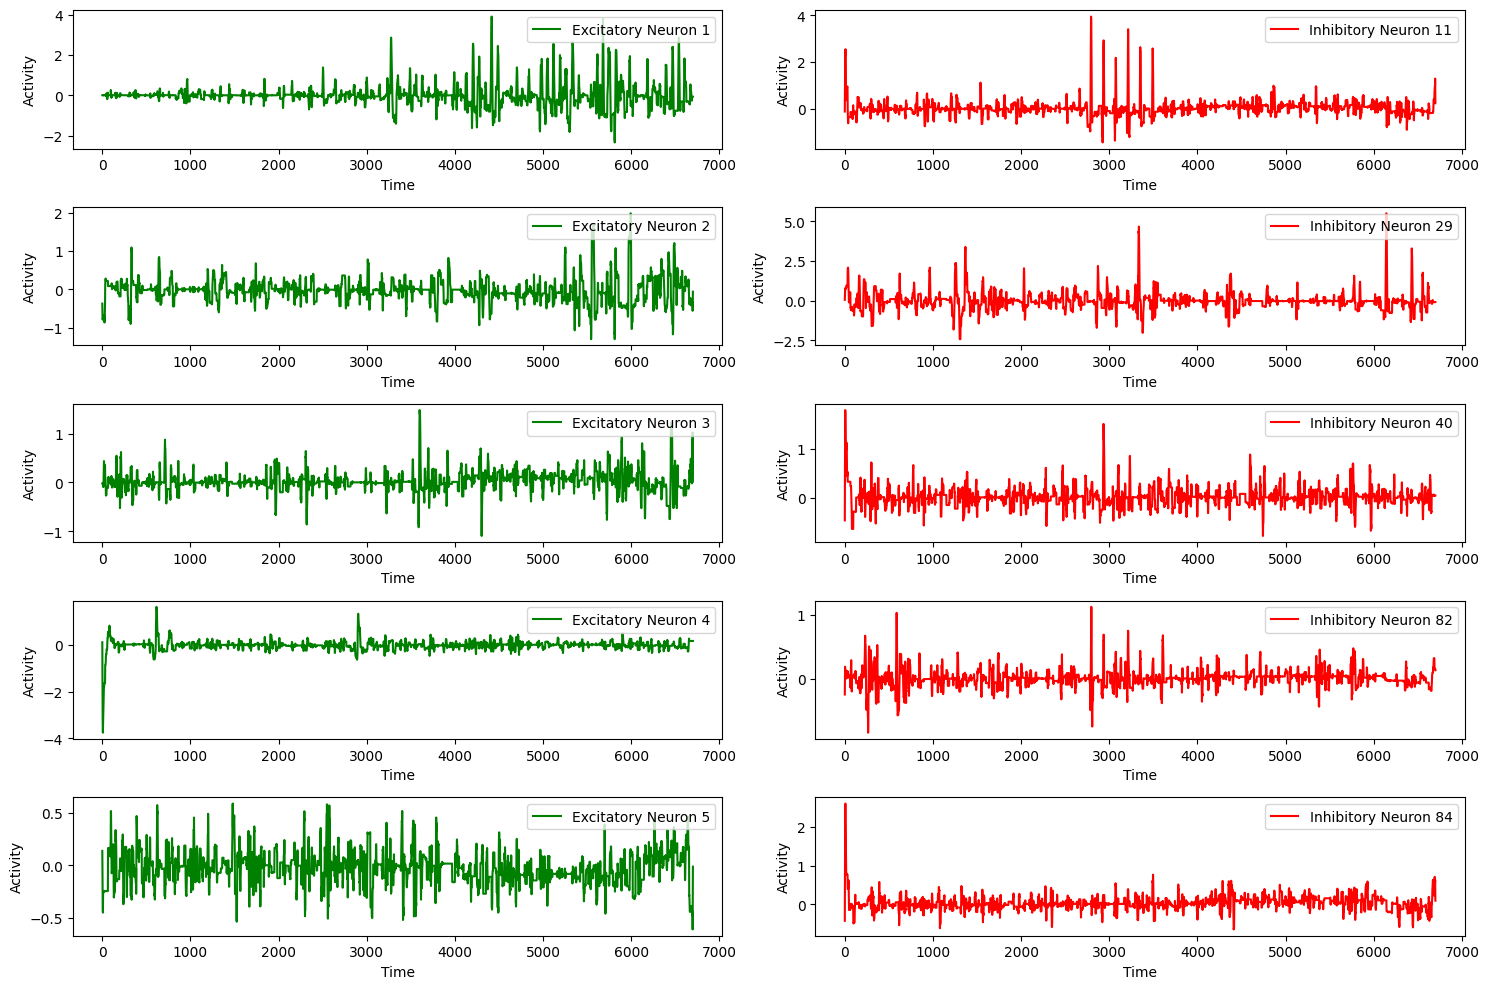

In [24]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtered_wave[selected_green_idx, :]
selected_red_data = dff_filtered_wave[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()

### Combination band + gauss

In [68]:
dff_filtere_comb=gaussian_filter1d(dff_filtered_bandpass,4)

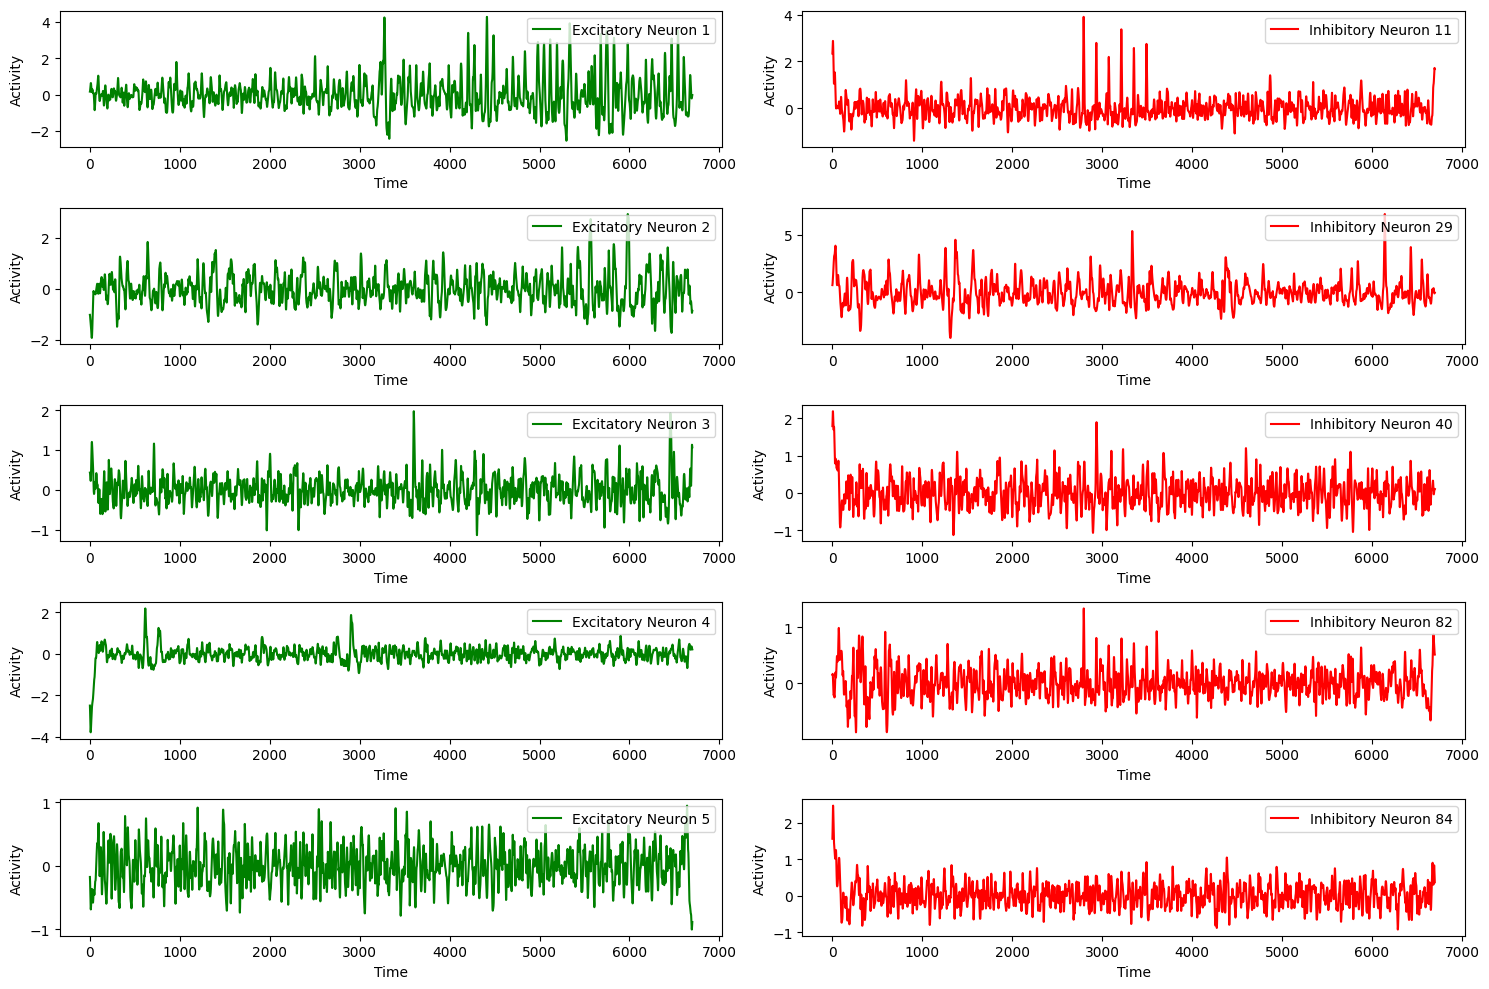

In [69]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtere_comb[selected_green_idx, :]
selected_red_data = dff_filtere_comb[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()


In [66]:
import numpy as np

def detect_spikes(signal, threshold_factor=1):
    mean = np.mean(signal)
    std = np.std(signal)
    threshold = mean + threshold_factor * std
    spikes = signal > threshold
    return spikes

# Assuming `data` is your preprocessed signal
spikes = detect_spikes(dff_filtere_comb)


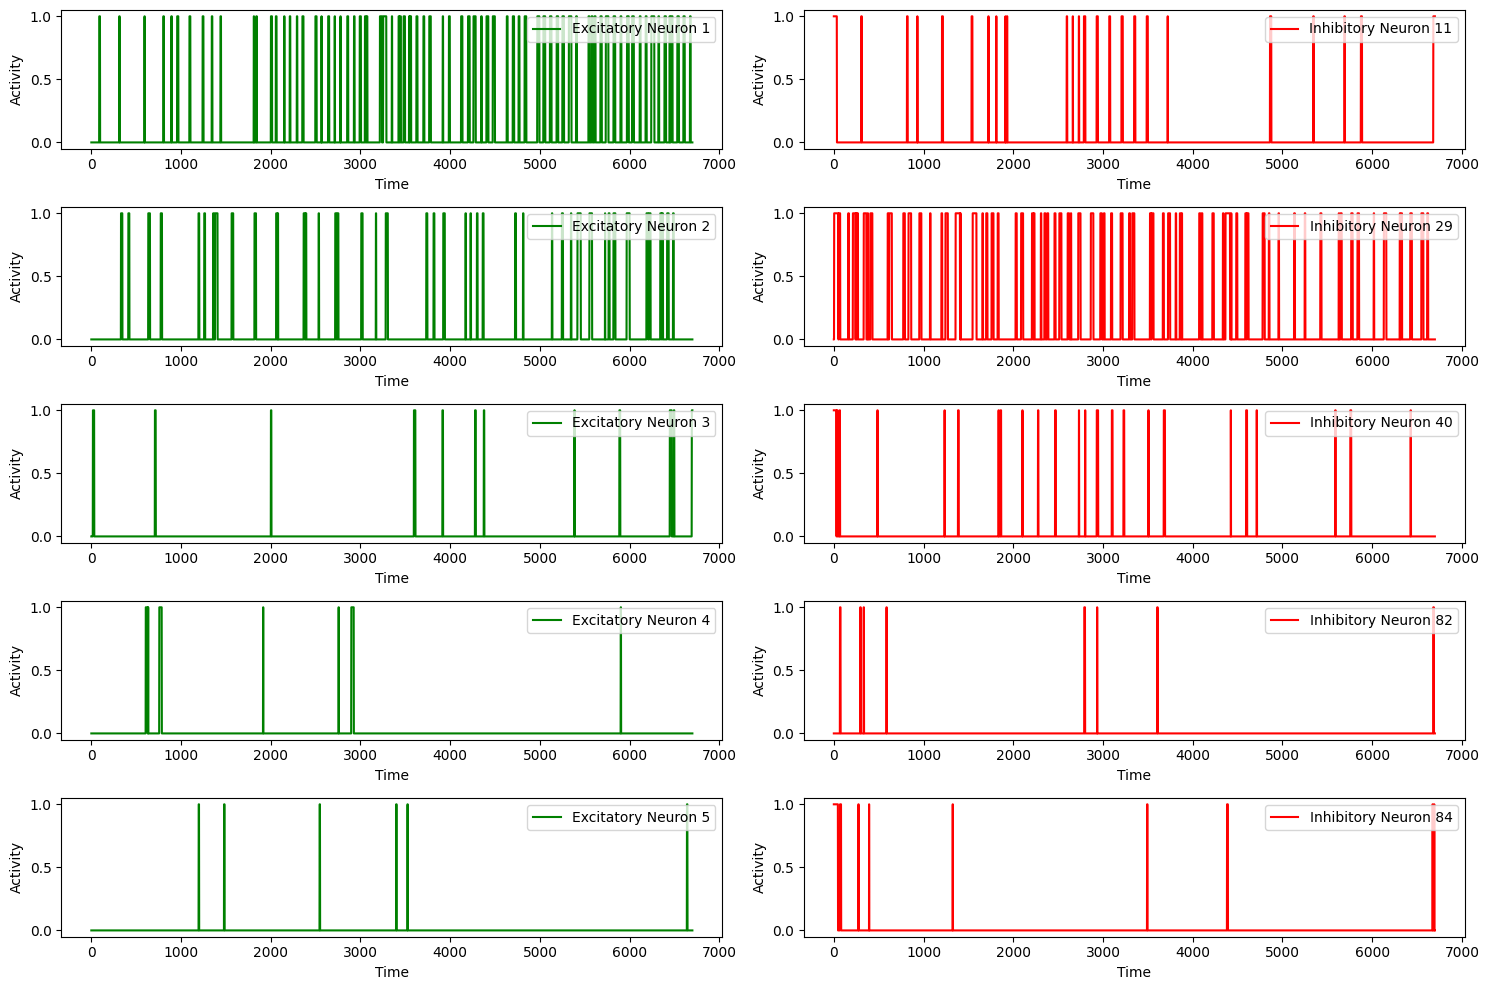

In [67]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = spikes[selected_green_idx, :]
selected_red_data = spikes[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()


### All 3 combined

In [122]:
dff_filtere_all=gaussian_filter1d(dff_filtered_wave,4)

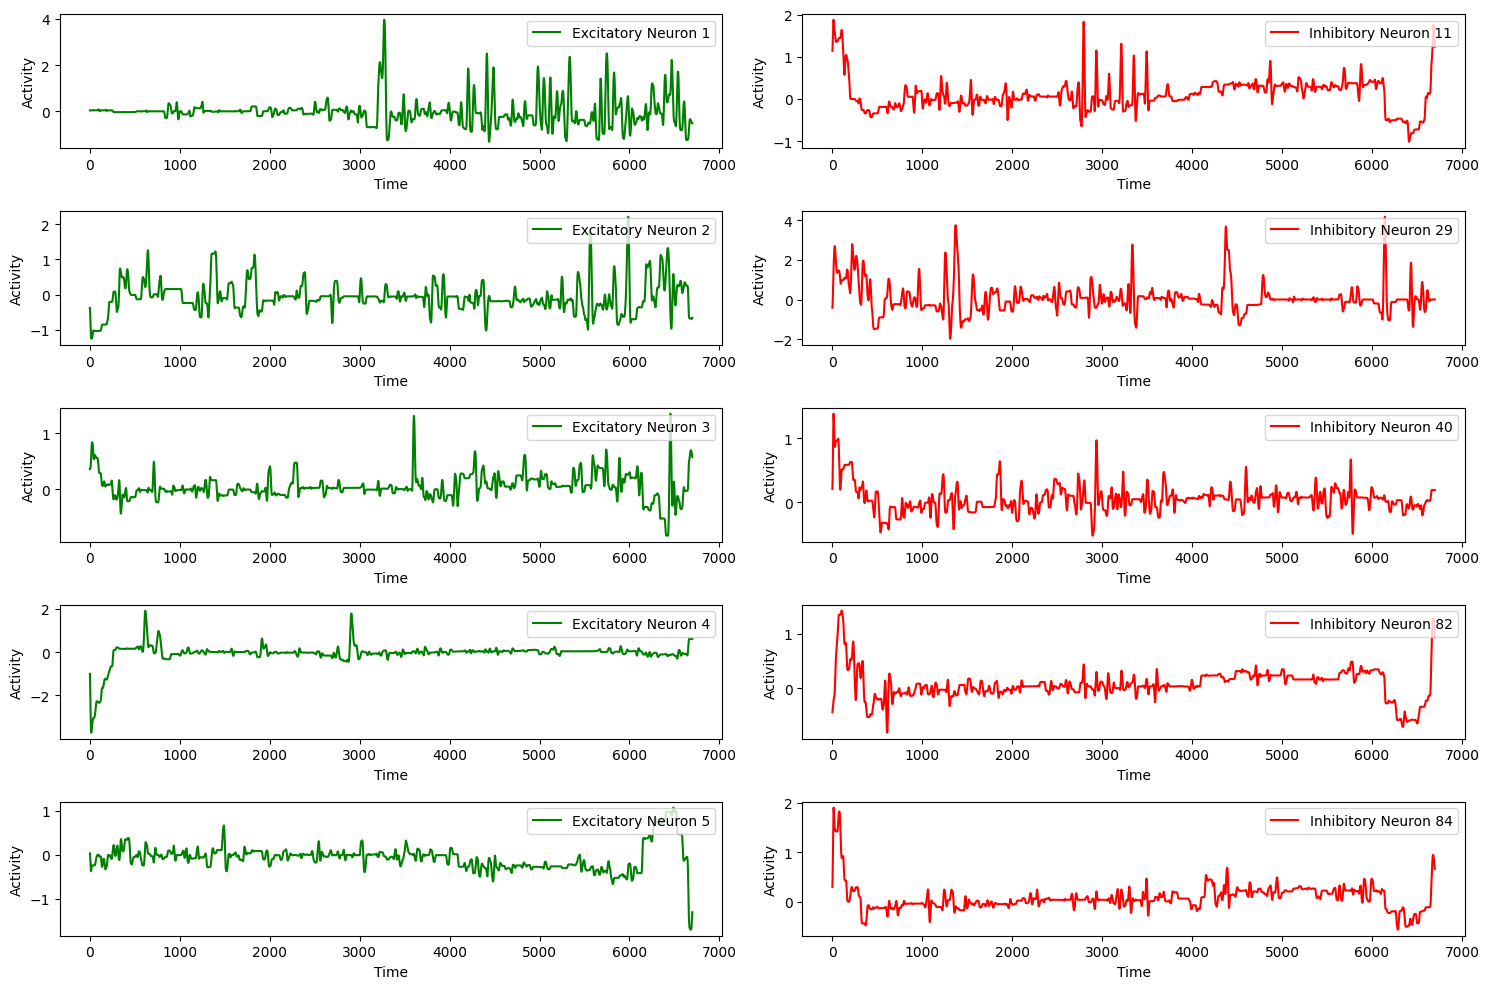

In [123]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtere_all[selected_green_idx, :]
selected_red_data = dff_filtere_all[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()

## Scaler test

In [25]:
import numpy as np
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
import pandas as pd

# Assuming dff_filtered is your data with the shape (5766, 6700)

# Initialize the StandardScaler
scaler = StandardScaler()
norma = Normalizer()
minMa = MinMaxScaler()
# Fit on your data and transform it
#dff_scaled = scaler.fit_transform(dff_filtered)

#dff_scaled_df = pd.DataFrame(dff_scaled)


In [26]:
"""SCALING ON FILTERED DATA"""

dff_scaled_temp= scaler.fit_transform(dff_filtered_wave.T)
dff_scaled=dff_scaled_temp.T

dff_scaled_df = pd.DataFrame(dff_scaled)

In [27]:

data_wrangler_wave=dff_filtered_wave.T
data_wrangler_scaled=dff_scaled.T


data_wrangler_wave

array([[ 0.0035425 , -0.36728594, -0.02283778, ...,  0.22290309,
         0.21372927, -0.16185653],
       [ 0.0035425 , -0.53751259, -0.02283778, ...,  0.4652413 ,
         0.39315908, -0.00721795],
       [ 0.0035425 , -0.68787885, -0.02283778, ...,  0.69600729,
         0.55894619,  0.13385153],
       ...,
       [-0.0724202 , -0.43675265,  0.76356809, ...,  0.68398522,
         0.0081851 , -0.00768154],
       [-0.0724202 , -0.25885382,  0.41189284, ...,  0.30967613,
         0.0081851 , -0.00768154],
       [-0.0724202 , -0.05841077,  0.01696451, ..., -0.0938211 ,
         0.0081851 , -0.00768154]])

In [28]:
data_wrangler_scaled

array([[ 0.02035715, -1.11656719, -0.23956917, ...,  1.12285221,
         2.07220429, -2.45248183],
       [ 0.02035715, -1.67659995, -0.23956917, ...,  2.60077619,
         3.84728509, -0.12202249],
       [ 0.02035715, -2.17129355, -0.23956917, ...,  4.00812588,
         5.48740006,  2.0039457 ],
       ...,
       [-0.11411735, -1.34510739,  3.72393453, ...,  3.93480806,
         0.03877686, -0.12900895],
       [-0.11411735, -0.75983375,  1.95148317, ...,  1.65204637,
         0.03877686, -0.12900895],
       [-0.11411735, -0.10039131, -0.03896473, ..., -0.80872221,
         0.03877686, -0.12900895]])

In [29]:
data['dff_filtered'] = dff_scaled

In [30]:
dff_filtered=data['dff_filtered']

In [31]:

print(dff_scaled_df.describe())

KeyboardInterrupt: 

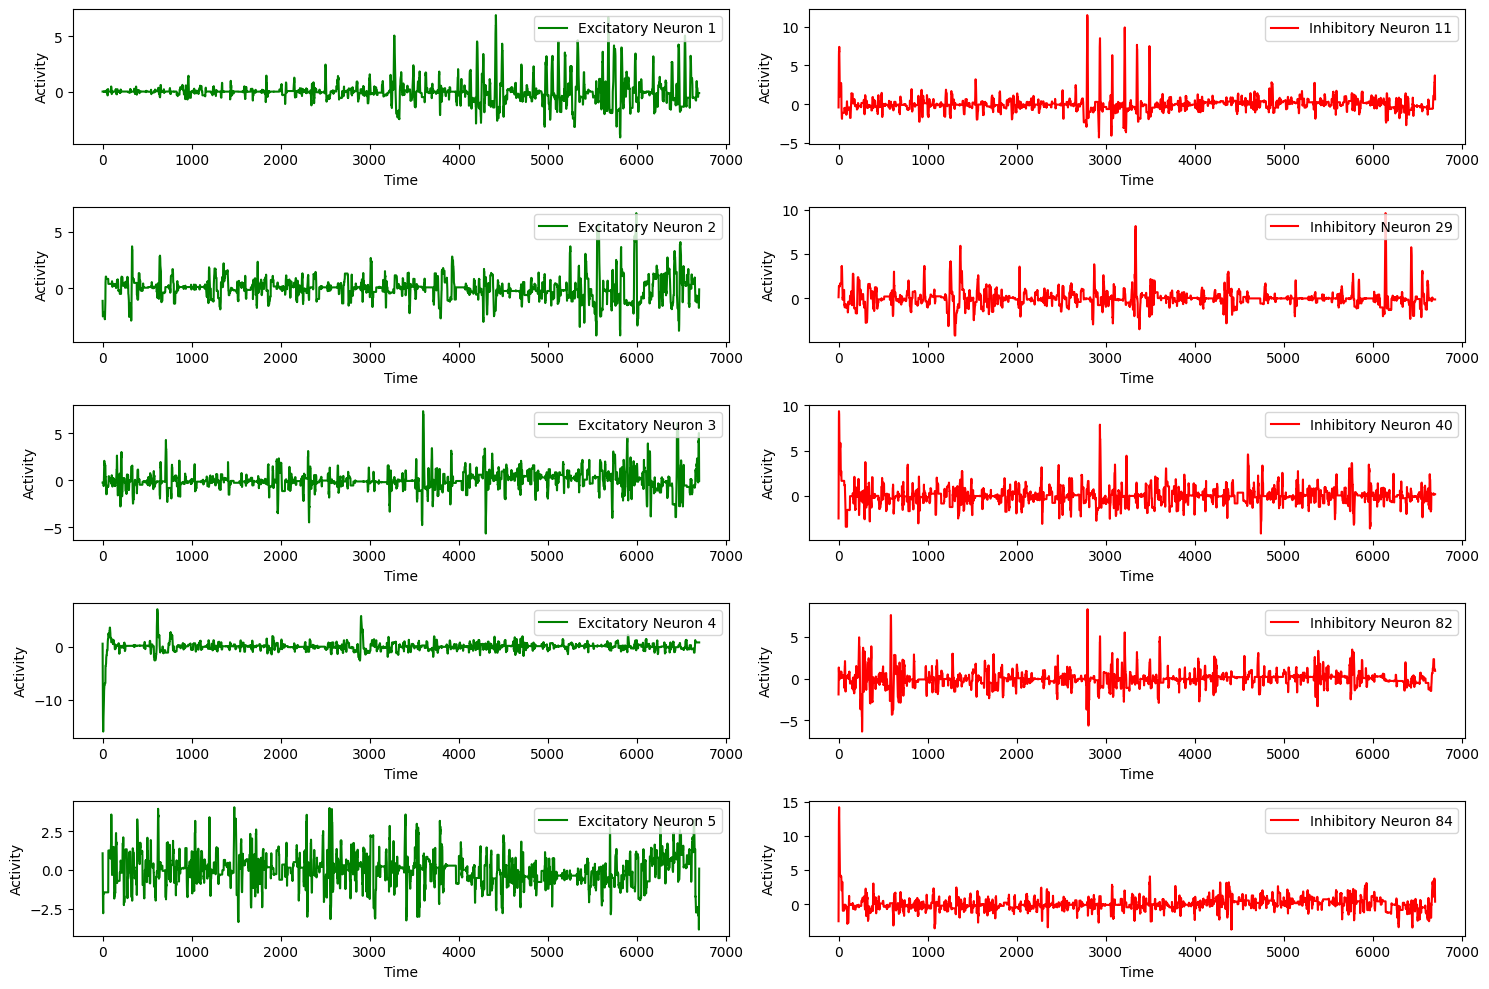

In [32]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtered[selected_green_idx, :]
selected_red_data = dff_filtered[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()





In [5]:
from scipy.io import loadmat
# Load the MAT file
data_path = 'dataPro.mat'
data_old = loadmat(data_path)

# Explore the keys and structure of the loaded data
data_keys = list(data.keys())
data_structure = {key: type(data[key]) for key in data_keys}

# Provide the keys and their data types to understand the structure
data_keys, data_structure

(['__header__',
  '__version__',
  '__globals__',
  'dff_filtered',
  'green_idx',
  'positions',
  'red_idx'],
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'dff_filtered': numpy.ndarray,
  'green_idx': numpy.ndarray,
  'positions': numpy.ndarray,
  'red_idx': numpy.ndarray})

In [6]:
dff_filtered_old=data_old['dff_filtered']
print(dff_filtered.shape)

(5766, 6700)


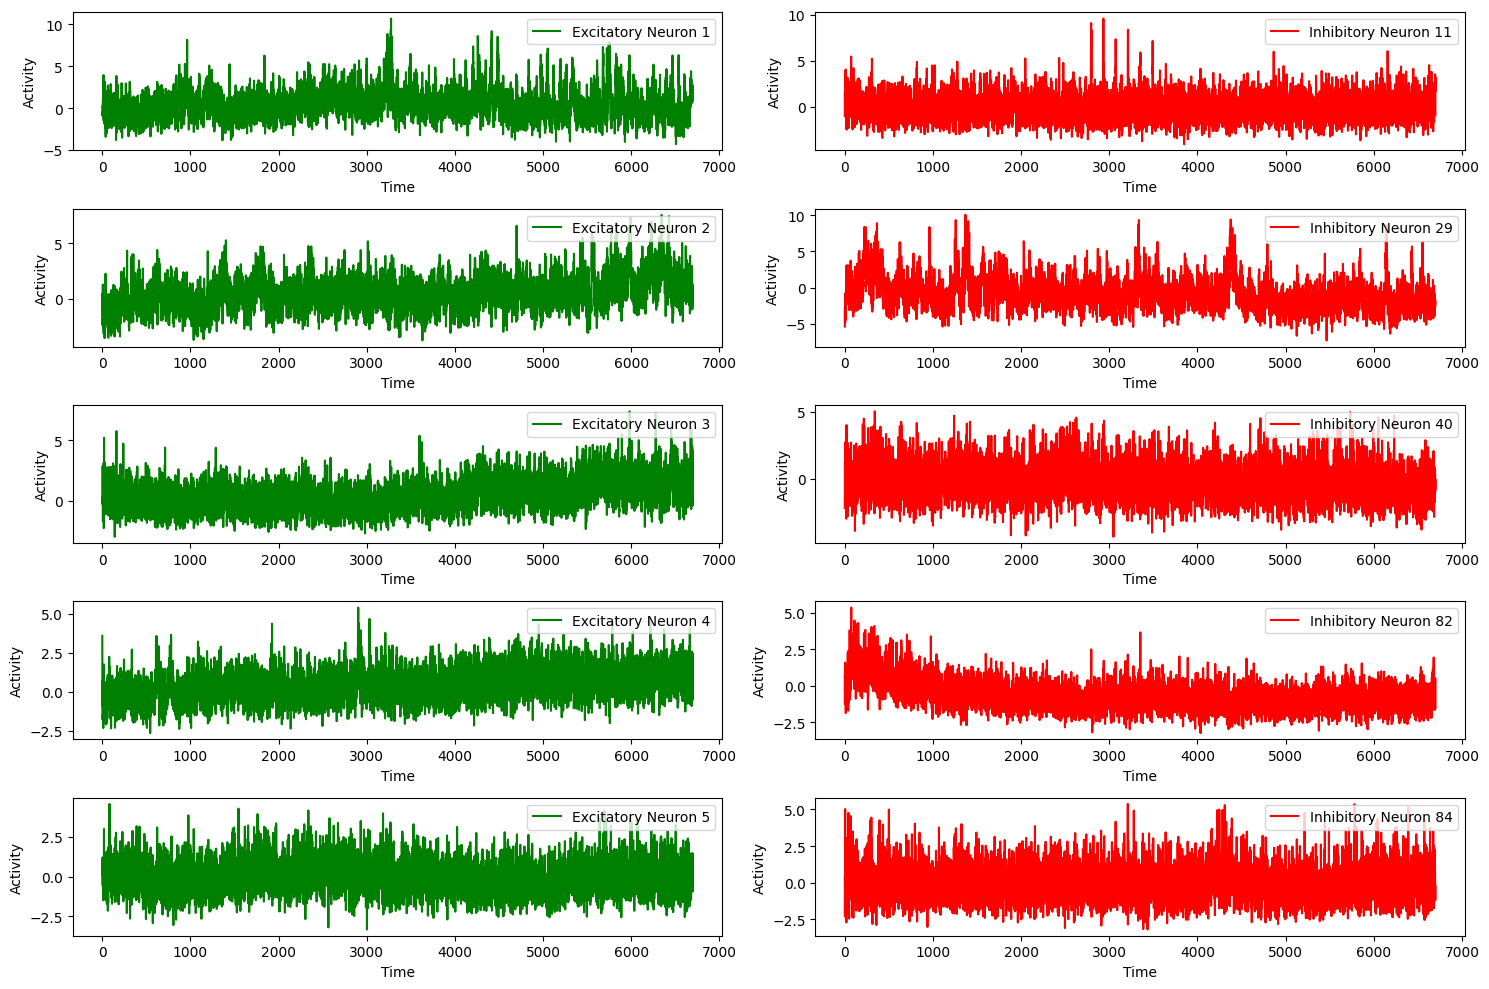

In [7]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data_old['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data_old['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtered_old[selected_green_idx, :]
selected_red_data = dff_filtered_old[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()


## PCA

In [36]:
from sklearn.decomposition import PCA

# Apply PCA, keeping the first 2 principal components for visualization
pca = PCA(n_components=5)
pca_result = pca.fit_transform(dff_filtered)

# Calculate the explained variance ratio of the first two components
explained_variance_ratio = pca.explained_variance_ratio_

pca_result, explained_variance_ratio

(array([[ 2.22632631e+00,  3.79975036e+00,  3.04631474e+01,
          8.94251712e+00, -1.01666526e+01],
        [ 2.12639885e+01,  1.37395582e+01, -1.44858080e+01,
         -1.06011874e+01,  6.51187334e+00],
        [ 1.94090416e+00, -2.32220059e+01,  1.04590463e+01,
          2.03455673e-01, -4.66386462e+00],
        ...,
        [-2.73237650e+01, -4.67358707e+01,  5.58176258e+00,
         -4.90696001e+00, -1.15778730e+01],
        [-2.88398217e+01, -1.85831292e-02, -1.75841119e+00,
         -1.12730616e+00, -3.94064156e+00],
        [-1.53705466e+01,  1.84409332e+00, -1.48118621e+00,
         -6.10243420e+00, -8.89573609e+00]]),
 array([0.08157675, 0.04629383, 0.02209775, 0.01721756, 0.01349929]))

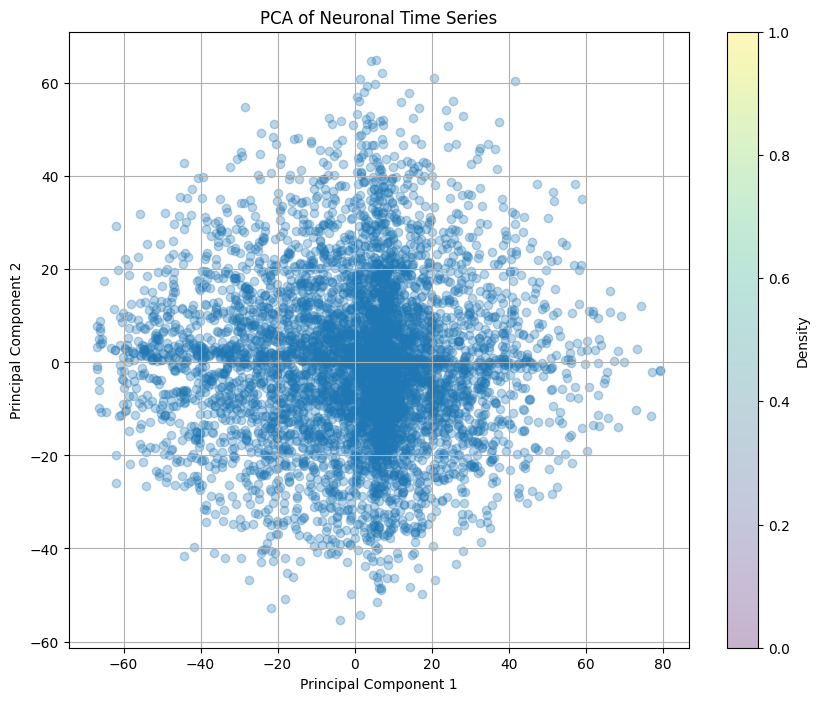

In [44]:
import matplotlib.pyplot as plt

# Plotting the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.3)
plt.title('PCA of Neuronal Time Series')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Density', alpha=0.5)
plt.grid(True)

# Show the plot
plt.show()


## Heat map

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

activity_data = np.array(dff_scaled)

# Now, create the heatmap
plt.figure(figsize=(20, 10))  # Adjust the size as needed
sns.heatmap(activity_data, cmap='RdBu_r', vmin=-3, vmax=3, xticklabels=1000, yticklabels=1000, cbar_kws={'label': 'Activity Level'})
plt.title('Neuron Activity Over Time')
plt.xlabel('Time Step')
plt.ylabel('Neuron')
plt.show()


NameError: name 'dff_scaled' is not defined

In [21]:

selected_green_data = dff_filtered[green_idx, :]
selected_red_data = dff_filtered[red_idx, :]

In [20]:

activity_data = np.array(selected_green_data)
# Now, create the heatmap
plt.figure(figsize=(20, 10))  # Adjust the size as needed
sns.heatmap(activity_data, cmap='RdBu_r', vmin=-5, vmax=5, xticklabels=1000, yticklabels=1000, cbar_kws={'label': 'Activity Level'})
plt.title('Neuron Activity Over Time')
plt.xlabel('Time Step')
plt.ylabel('Neuron')
plt.show()

NameError: name 'sns' is not defined

<Figure size 2000x1000 with 0 Axes>